In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsRegressor
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping
from keras.models import load_model    
%matplotlib inline
%config InlineBackend.figure_format = 'svg'    
sns.set()
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('houses_dataset.csv', index_col = 'Id')
df = df._get_numeric_data()
df = df.dropna(axis='columns')
df_rows = df.shape[0]
zero_precents = df.astype(bool).apply(lambda x: ~x).sum(axis = 0) / df_rows
zero_columns_labels = list(zero_precents[zero_precents > 0.333].index)
df = df.drop(zero_columns_labels, axis = 1)
df = df.drop(['KitchenAbvGr'], axis = 1)
df.head(10)

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                           
1           60     8450            7            5       2003          2003   
2           20     9600            6            8       1976          1976   
3           60    11250            7            5       2001          2002   
4           70     9550            7            5       1915          1970   
5           60    14260            8            5       2000          2000   
6           50    14115            5            5       1993          1995   
7           20    10084            8            5       2004          2005   
8           60    10382            7            6       1973          1973   
9           50     6120            7            5       1931          1950   
10         190     7420            5            6       1939          1950   

    BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  \
Id                                                                      
1          706        150          856       856       1710         2   
2          978        284         1262      1262       1262         2   
3          486        434          920       920       1786         2   
4          216        540          756       961       1717         1   
5          655        490         1145      1145       2198         2   
6          732         64          796       796       1362         1   
7         1369        317         1686      1694       1694         2   
8          859        216         1107      1107       2090         2   
9            0        952          952      1022       1774         2   
10         851        140          991      1077       1077         1   

    BedroomAbvGr  TotRmsAbvGrd  GarageCars  GarageArea  MoSold  YrSold  \
Id                                                                       
1              3             8           2         548       2    2008   
2              3             6           2         460       5    2007   
3              3             6           2         608       9    2008   
4              3             7           3         642       2    2006   
5              4             9           3         836      12    2008   
6              1             5           2         480      10    2009   
7              3             7           2         636       8    2007   
8              3             7           2         484      11    2009   
9              2             8           2         468       4    2008   
10             2             5           1         205       1    2008   

    SalePrice  
Id             
1      208500  
2      181500  
3      223500  
4      140000  
5      250000  
6      143000  
7      307000  
8      200000  
9      129900  
10     118000

## Correlation to Sale-Price

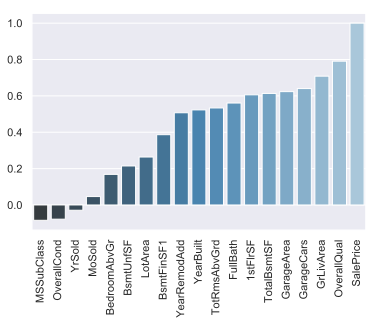

In [10]:
correlation = df.corr()['SalePrice'].sort_values()
#_ = sns.barplot(, )
dd = pd.DataFrame(correlation)
chart = sns.barplot(correlation.index, correlation.values, palette="Blues_d")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

## Correlation Heatmap

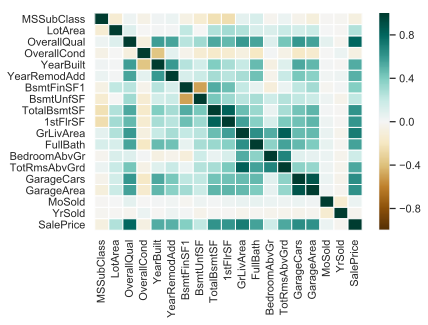

In [11]:
_ = sns.heatmap(df.corr(), cmap="BrBG", linewidths = 1, vmin = -1, vmax = 1)

In [25]:
_ = sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=df.columns, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'purple'}, 'scatter_kws': {'alpha': 0.2}})